<a href="https://colab.research.google.com/github/jeremyjcheng/SPIS-final-project-2023/blob/main/CasaCrawlers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! rm -rf "SPIS Training Images"

In [ ]:
! gdown  1uX3_nPqkIqsu474VgHAGh1jsX47PZmVb
! unzip "SPIS_Images.zip" -d .
! gdown 1-VGolXn9FI6Ro9_AChu77d5pYS4xX7gX

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Preprocessing
data = pd.read_csv("Toronto_Apartments.csv")
data.head(11)

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2,0,"11 Brunel Ct, Toronto, ON M5V 3Y3, Canada",43.639406,-79.393232,"$3,150.00"
1,2,2,0,"12 Yonge St, Toronto, ON M5E 1Z9, Canada",43.643105,-79.375906,"$3,200.00"
2,1,1,0,"438 Richmond St W, Toronto, ON M5V 1X9, Canada",43.648005,-79.396834,"$2,500.00"
3,1,1,1,"12 York St, Toronto, ON M5J 2Z2, Canada",43.641873,-79.381906,"$2,400.00"
4,1,1,0,"3525 Kariya Dr, Mississauga, ON L5B 0C1, Canada",43.588602,-79.631700,"$1,900.00"
5,2,2,0,"168 Simcoe St, Toronto, ON M5H 4C9, Canada",43.650092,-79.387374,"$3,600.00"
6,2,2,0,"70 Temperance St, M5H4E8, Toronto, ON",43.650560,-79.382072,"$3,000.00"
7,2,1,0,"700 Ross st, L7S 1S2, Burlington, ON",43.328986,-79.808618,"$1,600.00"
8,1,1,0,"10 Capreol Ct, Toronto, ON M5V 4B3, Canada",43.640223,-79.395951,"$2,200.00"
9,2,2,0,"5 Hanna Ave, Toronto, ON M6K 0B3, Canada",43.637453,-79.418387,"$2,500.00"


In [ ]:
data['Address']

0          11 Brunel Ct, Toronto, ON M5V 3Y3, Canada
1           12 Yonge St, Toronto, ON M5E 1Z9, Canada
2     438 Richmond St W, Toronto, ON M5V 1X9, Canada
3            12 York St, Toronto, ON M5J 2Z2, Canada
4    3525 Kariya Dr, Mississauga, ON L5B 0C1, Canada
5         168 Simcoe St, Toronto, ON M5H 4C9, Canada
6              70 Temperance St, M5H4E8, Toronto, ON
7               700 Ross st, L7S 1S2, Burlington, ON
8         10 Capreol Ct, Toronto, ON M5V 4B3, Canada
9           5 Hanna Ave, Toronto, ON M6K 0B3, Canada
Name: Address, dtype: object

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Street Address/Monthly Rent/Number of Bedrooms/Number of bathrooms:
11 Brunel Ct, Toronto, ON M5V 3Y3, Canada $3,150.00 2 2


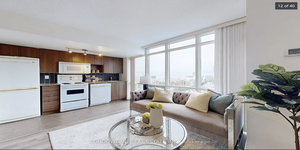

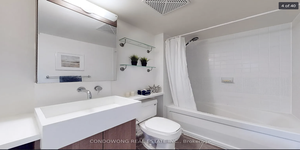

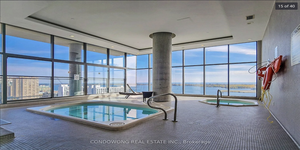

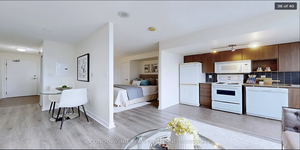

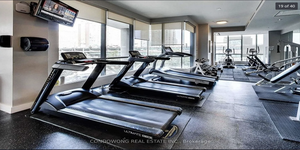

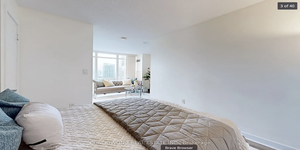

KeyboardInterrupt: ignored

In [4]:
from PIL import Image
import os

Capreol_Ct = Image.open("/content/SPIS Training Images/10 Capreol Ct, Toronto, ON M5V 4B3, Canada/Screenshot 2023-09-01 at 10.42.57 AM.png")
#display(Capreol_Ct)

Capreol_Image2 = Image.open("/content/SPIS Training Images/10 Capreol Ct, Toronto, ON M5V 4B3, Canada/Screenshot 2023-09-01 at 10.43.37 AM.png")
#display(Capreol_Image2)

# for file in os.listdir("/content/SPIS Training Images/10 Capreol Ct, Toronto, ON M5V 4B3, Canada"):
#   filename = os.fsdecode(file)
#   if filename.endswith(".png"):
#     Capreol_Court = Image.open(os.path.join("/content/SPIS Training Images/10 Capreol Ct, Toronto, ON M5V 4B3, Canada", filename))
#     display(Capreol_Court)

# loop through rows of dataframe, take features and print, print text data, take image and run through display_address, input like or dislike, keep track of index if they like or not
def display_address(address):
  for file in os.listdir("/content/SPIS Training Images/" + address):
    filename = os.fsdecode(file)
    if filename.endswith(".png"):
      address_pictures = Image.open(os.path.join("/content/SPIS Training Images/" + address, filename))
      address_pictures = address_pictures.resize((300, 150), Image.Resampling.LANCZOS)
      display(address_pictures)

# display_address("11 Brunel Ct, Toronto, ON M5V 3Y3, Canada")
responses = []
print("Street Address/Monthly Rent/Number of Bedrooms/Number of bathrooms:")
for index in range(len(data)):
  print(data.loc[index,"Address"], data.loc[index,"Price"], data.loc[index, "Bedroom"], data.loc[index, "Bathroom"])
  display_address(data.loc[index,"Address"])
  single_response = input("Do you like this house (y/n)? ")
  if single_response == "y":
    responses.append(1)
  if single_response == "n":
    responses.append(0)

print(responses)

data['Preference'] = responses #added preference column to dataframe

In [ ]:
data.head(10)

NameError: ignored

In [ ]:
def convertPriceToNumber(price_as_string):
  price_as_string = price_as_string.replace('$', '')
  price_as_string = price_as_string.replace(',', '')
  price_as_number = float(price_as_string)
  adjusted_price_as_number = price_as_number * 1.22
  return adjusted_price_as_number

data['Price'] = data['Price'].apply(convertPriceToNumber)

In [ ]:
data.head(10)

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,Preference
0,2,2,0,"11 Brunel Ct, Toronto, ON M5V 3Y3, Canada",43.639406,-79.393232,3843.0,1
1,2,2,0,"12 Yonge St, Toronto, ON M5E 1Z9, Canada",43.643105,-79.375906,3904.0,0
2,1,1,0,"438 Richmond St W, Toronto, ON M5V 1X9, Canada",43.648005,-79.396834,3050.0,1
3,1,1,1,"12 York St, Toronto, ON M5J 2Z2, Canada",43.641873,-79.381906,2928.0,0
4,1,1,0,"3525 Kariya Dr, Mississauga, ON L5B 0C1, Canada",43.588602,-79.631700,2318.0,1
5,2,2,0,"168 Simcoe St, Toronto, ON M5H 4C9, Canada",43.650092,-79.387374,4392.0,0
6,2,2,0,"70 Temperance St, M5H4E8, Toronto, ON",43.650560,-79.382072,3660.0,1
7,2,1,0,"700 Ross st, L7S 1S2, Burlington, ON",43.328986,-79.808618,1952.0,0
8,1,1,0,"10 Capreol Ct, Toronto, ON M5V 4B3, Canada",43.640223,-79.395951,2684.0,1
9,2,2,0,"5 Hanna Ave, Toronto, ON M6K 0B3, Canada",43.637453,-79.418387,3050.0,0


In [ ]:
data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10 entries, 0 to 9
Series name: Bedroom
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 208.0 bytes


In [ ]:
Possible models for classifying preference of new listings:
KNeighborsClassifier (sk.learn)
MLPClassifier #Neural Networks
DecisionTreeClassifier